## Correr el encabezado antes de comenzar para cargar todas las funiones

In [68]:
#Encabezado del archivo
import os,csv
import pandas as pd
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
%matplotlib inline

def cargar_txt_en_lista(file_path):
    return_list = []
    with open(file_path,"r") as openfile:
        for lines in openfile:
            return_list.append(lines.replace("\n",""))
            
    return return_list

#Filtros de String para dataframe
#Variante para una columna

def sfilter_by_col(df_query,col_name,text,has=True):
    df_return = df_query.loc[df_query[col_name].str.contains(text)==has]
    return df_return

def sfilter_linage(df_query,text,has=True):
    df_return = df_query.loc[df_query["Linage"].str.contains(text)==has]
    return df_return


def sfilter_org(df_query,text,has=True):
    df_return = df_query.loc[df_query["Organism"].str.contains(text)==has]
    return df_return

def sfilter_by_uniprot(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return df_return


def get_pdb_list_from_df(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return_list = filter_by_uniprot(df_proteins_celular,"P04637").iloc[0]["PDB_CHAIN_LIST"]
    return return_list

def printd(text):
    display(Markdown(text))
    return

def strlen(x):
    return str(len(x))

def check_not_None(thing):
    if type(thing) != type (None):
        return True
    else:
        return False


printd("### Funciones cargagadas correctamente, puede continuar.")

### Funciones cargagadas correctamente, puede continuar.

# Correr el main para generar el Informe Base



# Fercha del informe 2019-09-04

## Reading swissprot

Dataframe size: 560459

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs
0,Q0ATK2,ACCD_MARMM,reviewed,Acetyl-coenzyme A carboxylase carboxyl transfe...,accD Mmar10_0089,Maricaulis maris (strain MCS10),311,"cellular organisms, Bacteria, Proteobacteria, ...",MTEKSNGMSWLSKITPPGMSKIFSKRDTPDNLWVKCPVSEEMVFHK...,394221
1,O40976,1A_CMVNT,reviewed,Replication protein 1a [Includes: ATP-dependen...,ORF1a,Cucumber mosaic virus (strain NT9) (CMV),993,"Viruses, Riboviria, Bromoviridae, Cucumovirus,...",MATSSFNINELVASHGDKGLLATALVDKTAHEQLEEQLQHQRRGRK...,117124
2,Q84P24,4CLL6_ARATH,reviewed,4-coumarate--CoA ligase-like 6 (EC 6.2.1.-) (4...,4CLL6 At4g19010 F13C5.180,Arabidopsis thaliana (Mouse-ear cress),566,"cellular organisms, Eukaryota, Viridiplantae, ...",MAATHLHIPPNPKTQTSHQNPPFWFSSKTGIYTSKFPSLHLPVDPN...,3702
3,P62260,1433E_RAT,reviewed,14-3-3 protein epsilon (14-3-3E) (Mitochondria...,Ywhae,Rattus norvegicus (Rat),255,"cellular organisms, Eukaryota, Opisthokonta, M...",MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...,10116
4,P0CK20,A25_VACCC,reviewed,Protein A2.5,A2.5L,Vaccinia virus (strain Copenhagen) (VACV),76,"Viruses, Poxviridae, Chordopoxvirinae, Orthopo...",MSWYEKYNIVLNPPKRCSSACADNLTTILAEDGNHIRAILYSQPKK...,10249


## Reading PDBSWS

swslist dataframe size: 47097

,UNIPROT_ID,PDB_CHAIN_LIST,pdb_chain_count
0,A0A010,"[5B00_A, 5B00_B, 5B00_C, 5B01_A, 5B01_B, 5B01_...",57
1,A0A011,"[3VK5_A, 3VK5_B, 3VKA_A, 3VKA_B, 3VKB_A, 3VKB_...",10
2,A0A585,[4MNQ_E],1
3,A0A5A3,"[4UDT_B, 4UDU_B]",2
4,A0A5B3,"[5NHT_B, 5NQK_B]",2


# Merge Sprot with SWS

Dataframe size: 26550

,Length,Taxonomic lineage IDs,pdb_chain_count
count,26550.000000,2.655000e+04,26550.000000
mean,454.547081,1.216896e+05,10.030245
std,545.239279,1.946628e+05,30.223010
min,5.000000,1.700000e+01,1.000000
25%,188.000000,9.606000e+03,2.000000
50%,328.000000,1.009000e+04,4.000000
75%,529.000000,2.089640e+05,8.000000
max,34350.000000,2.510777e+06,1084.000000


# Resumen de informacion del conjunto de proteinas a estudiar

Viruses Dataframe size: 567

Celular Dataframe size: 10165

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bacteria dataframe size: 3694

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Archaea dataframe size: 418

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Eukaryota dataframe size: 6053

# Graficos del dataframe de trabajo( Organismos Celulares)

## Histograma de Length menores a 3000

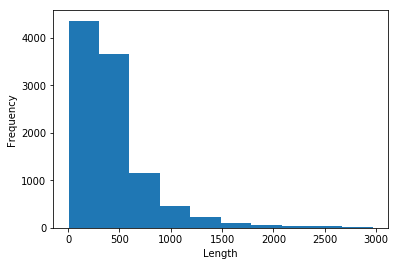

## Histograma de pdb_chain_count menores a 200

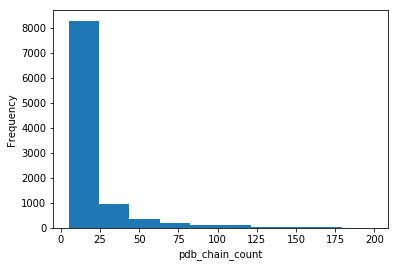

informe generado en 7.063522577285767

In [10]:
import time,datetime
# MAIN/CARGA DE DATOS
printd("# Fercha del informe "+str(datetime.date.today()))
tiempo_inicial = time.time()

log_error = dict()
log_error["SWISPROT"] = list()
log_error["PDBSWS_PDBUNIPROT"] = list()

# paths de archivos iniciales
path_swissprot_tab =  "bases_de_datos_ref/uniprot-reviewed_20190730.tab"
path_pdbwsw_pdbchain = "bases_de_datos_ref/pdb_uniprot_chain_map.lst.2"


#CARGAR SWISSPROT
printd ("## Reading swissprot")

df_sprot = pd.read_csv(path_swissprot_tab,sep="\t")
df_sprot.columns = ['UNIPROT_ID', 
                    'Entry_name', 
                    'Status', 
                    'Protein_names', 
                    'Gene names', 
                    'Organism', 
                    'Length', 'Linage', 
                    'Sequence', 
                    'Taxonomic lineage IDs']
printd("Dataframe size: "+strlen(df_sprot))
display(df_sprot.head(n=5))


#ESTE BLOQUE SIRVE PARA CARGAR SIFTS, 
#actualmente no esta en uso
#
"""
printd ("## Reading sitfs")
df_sifts = pd.read_csv("bases_de_datos_ref/sifts_uniprot_pdb.tsv",header=1,sep="\t")
df_sifts.columns = ["UNIPROT_ID","PDB_list_sifts"]
printd("Dataframe size: "+strlen(df_sifts))
display(df_sifts.head(n=5))

printd ("Merge sprot with sifts")
df_sprot_pdb = pd.merge(df_sprot,df_sifts,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.head(n=1))
"""

###CARGAR PDBSWS
printd ("## Reading PDBSWS")
#Esto carga la lista manualmente por que algunos codigos uniprot no figuran.
#son listas de ancho fijo (ej: '101m A P02185')
#algunas lineas del archivo 
lst_pdbsws = []
tmp_pdbsws = cargar_txt_en_lista(path_pdbwsw_pdbchain)
for index,line in enumerate(tmp_pdbsws):
    if (line[-1] != "?") and (line[-1] != " "):
        pdb_chain_id = line[0:4].upper()+"_"+line[5] 
        tmp = [pdb_chain_id,line[0:4],line[5],line[7:]]
        lst_pdbsws.append(tmp)
    else:
        #Los errores de carga de archivos se anexan a su log
        message = "Error in line "+ str(index) + ": "+ (line) 
        log_error["PDBSWS_PDBUNIPROT"].append(message)
#Borrar vbariables
del pdb_chain_id
del tmp_pdbsws
del tmp
#Crea el dataframe usando la lista
df_pdbsws = pd.DataFrame(lst_pdbsws).dropna()
df_pdbsws.columns = ["PDB_CHAIN_ID","PDB","CHAIN","UNIPROT_ID"]
#Los agrupa por pdb
df_swslist = df_pdbsws.groupby(["UNIPROT_ID"],as_index=False).agg({'PDB_CHAIN_ID':lambda x:list(x)})
#Agrega el numero de pdbs en la lista
df_swslist["pdb_chain_count"] = df_swslist.apply({"PDB_CHAIN_ID":lambda x: len(x)})
df_swslist.columns= ["UNIPROT_ID","PDB_CHAIN_LIST" ,"pdb_chain_count"]
#Informe visible
printd ("swslist dataframe size: "+strlen(df_swslist))
display(df_swslist.head())

### MERGE: AGREGA las columnas de sws a sprot, elimina los uniprot que no tengan mapeo.
printd ("# Merge Sprot with SWS")
df_sprot_pdb = pd.merge(df_sprot,df_swslist,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.describe())

### FILTRANDO
# De las proteinas con mas de 5 cadenas, 
# Separar los virus en una tabla aparte.
df_work = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses")==False)]
df_virus = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses"))]
printd ("# Resumen de informacion del conjunto de proteinas a estudiar")
printd ("Viruses Dataframe size: "+strlen(df_virus) )
printd ("Celular Dataframe size: "+strlen(df_work))
for taxa in ["Bacteria","Archaea","Eukaryota"]:
    printd ("&nbsp;"*6+taxa+" dataframe size: "+strlen (sfilter_linage(df_work,taxa)))

printd("# Graficos del dataframe de trabajo( Organismos Celulares)")

printd("## Histograma de Length menores a 3000")
plot_his1 = df_work["Length"].loc[df_work["Length"]<3000].plot(kind="hist")
plot_his1.set_xlabel("Length")
plt.show()


printd("## Histograma de pdb_chain_count menores a 200")
plot_his2 = df_work["pdb_chain_count"].loc[df_work["pdb_chain_count"]<200].plot(kind="hist")
plot_his2.set_xlabel("pdb_chain_count")
plt.show()

printd( "informe generado en "+str(time.time()-tiempo_inicial))


#Esta linea guarda el df_work en un archivo tsv
df_work.to_csv("archivos_importantes/df_work_"+str(datetime.date.today())+".tsv",sep="\t")

# Guardar en archivo

In [7]:
#Esto arma una lista global de pdb en el df_work
def update_pdb_dowladed(dataframe):
    for i,row in dataframe.iterrows():
        filename = "ent_files/pdb"+row[0].lower()+".ent"
        if os.path.isfile (filename):
            dataframe.at[i,"dowloaded"] = True
            dataframe.at[i,"path_to_entfile"] = filename
    return

full_pdb_list = set()
for lines in df_work["PDB_CHAIN_LIST"]:
    full_pdb_list.update(set([x[0:4] for x in lines]))

df_full_pdb = pd.DataFrame(list(full_pdb_list))
df_full_pdb.columns = ["PDB_ID"]
df_full_pdb["dowloaded"] = False
df_full_pdb["path_to_entfile"] = None
printd ("PDB LIST is "+strlen(df_full_pdb))
display(df_full_pdb.head())

update_pdb_dowladed(df_full_pdb)

df_full_pdb.loc[df_full_pdb["dowloaded"]==True]

PDB LIST is 82289

,PDB_ID,dowloaded,path_to_entfile
0,2FYN,False,None
1,2CAN,False,None
2,5KIJ,False,None
3,2F1A,False,None
4,2D7Y,False,None


,PDB_ID,dowloaded,path_to_entfile
1122,4IBW,True,ent_files/pdb4ibw.ent
1350,1SAL,True,ent_files/pdb1sal.ent
1860,1KZY,True,ent_files/pdb1kzy.ent
1887,3KZ8,True,ent_files/pdb3kz8.ent
1938,4AGO,True,ent_files/pdb4ago.ent
2764,2J21,True,ent_files/pdb2j21.ent
3048,2BIQ,True,ent_files/pdb2biq.ent
3122,2KS1,True,ent_files/pdb2ks1.ent
3589,2MZD,True,ent_files/pdb2mzd.ent
3924,2N0A,True,ent_files/pdb2n0a.ent


# Aplicacion sobre proteinas de ejemplo

In [147]:
#Checkquer estructura de carpetas
folder_list = ["ent_files","fasta","blast","pdb_chains","cd-hit-results-0.95","cd-hit-results-0.80","tree"]
print ("Checking folder structure.")
for folder in folder_list:
    if not os.path.isdir(folder):
        print ("Creating folder "+ folder)
        os.mkdir(folder)



#Crea un diciconario para acumular los datos a usar
#crea un diccionario que contiene dataframes especificos utiles
#las llaves son los uniprot_id.


def dibujar_histograma(df_query,col):
    plot_his1 = df_query[col].plot(kind="hist")
    plot_his1.set_xlabel(col)
    plt.show()
    return

def show_ensemble_info(query):
    printd("## Mostrando datos de la proteina de estudio")
    for entry in ensemble_data[query]:
        printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(ensemble_data[query][entry])+"`")
    return

def run_blast(fasta_file):
    output_filename = fasta_file.replace("fasta/","blast_results/").replace(".fasta","_blast_results.txt")
    cmd = "blastp -query "+ fasta_file +" -db uniprot_sprot.db -evalue 1e-10 -out "+ output_filename +" -outfmt '6 qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcovs' -num_alignments 1000"
    os.system(cmd)
    return output_filename


#el imput es el fasta con los homologos, el coef tiene que ser un string.
def cdhit_stuff(filename_hsf,coef):
    outfile_cdhit =  filename_hsf.replace("fasta/homologs_sprot/","cd-hit-results-"+coef+"/").replace("_homologs_sprot.fasta","_cd-hit")
    
    #si el archivo no existe, corre el cdhit
    if not os.path.isfile(outfile_cdhit):
        cmd = "cd-hit -i " + filename_hsf + " -o " + outfile_cdhit + " -c "+coef
        os.system(cmd)
        
    outfile_cdhit = outfile_cdhit+".clstr"
    #parsea los resultados del cdhit
    clusters = dict()    
    if os.path.isfile(outfile_cdhit):
        with open(outfile_cdhit,"r") as openfile:
            for line in openfile:
                text = line.replace("\n","")
                if text[0] == ">":
                    clus_num = (text[1:])
                    clusters[clus_num] = list()
                if text[0] in [str(x) for x in range(0,10)]:
                    uniprot_id =  (text.split(">")[1][0:6])
                    rep = int ("*" in text.split(">")[1])
                    clusters[clus_num].append( [uniprot_id,bool(rep)])
        return outfile_cdhit,clusters
    else:
        return "N/A","N/A"



ensemble_data = dict()
ensemble_df = dict()
#esta es la funcion importante
def estudiar_proteina(query,show=True):
    #Check que el query sea correcto
    if not query in list(df_work["UNIPROT_ID"]):
        print ("La proteina solicitada no se encuentra disponible.")
        return False
    
    #premite la escritura en las variables globales
    global ensemble_data
    global ensemble_df
    
    #carga informacion en ensemble_data y ensemble_df
    ensemble_df[query] = dict()
    ensemble_data[query] = dict(sfilter_by_uniprot(df_work,query).iloc[0])
    #da una lista 
    ensemble_data[query]["PDB_in_df_work"] = (list(set([x[0:4] for x in ensemble_data[query]["PDB_CHAIN_LIST"]])))

    #create fasta file with query seq
    with open ("fasta/"+query+".fasta","w") as openfile:
        openfile.write (">"+query+"\n")
        openfile.write (ensemble_data[query]["Sequence"]+"\n")
    
    #BUSCAR RESULTADOS DEL BLAST, SI NO EXISTEN, CORRERLO
    blast_results_filename = "blast_results/"+query+"_blast_results.txt"
    if os.path.isfile(blast_results_filename):
        if os.path.getsize(blast_results_filename) == 0:
            if show: print ("R ",end="")
            os.system("rm "+blast_results_filename)
            ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
        else:
            ensemble_data[query]["blast_results"] = blast_results_filename
    else:
        ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
    
    
    #PARSEAR LOS RESULTADOS EL BLAST y cargarlos a ensemble data
    if os.path.getsize(ensemble_data[query]["blast_results"]) > 0:
        #leer los datos importantes del blast y colocarlos en un dataframe
        df1 = pd.read_csv(ensemble_data[query]["blast_results"],header=None,sep="\t")
        df1.columns = "qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcov".split(" ")
        df1["UNIPROT_ID"] =  df1["sseqid"].str.split("|",expand=True)[1]
        #se agregan los valores de qstart y qend
        ensemble_df[query]["blast_results"] =df1[["UNIPROT_ID","pident","qcov","qstart","qend","sstart","send","gaps"]].loc[(df1["UNIPROT_ID"]!=query) & (df1["pident"]>30) & (df1["qcov"]>75) ]
        del df1
        #carga la infomacion de los homologos al ensemble_data
        ensemble_data[query]["homologs_sprot"] = list(set(list(ensemble_df[query]["blast_results"]["UNIPROT_ID"])))
        ensemble_data[query]["homologs_in_df_work"] = list(set(df_work["UNIPROT_ID"]) & set(ensemble_data[query]["homologs_sprot"]))
    else:
        ensemble_data[query]["homologs_sprot"] = []
        if show: printd("## Alerta, blast_results still 0 "+query)    

        return False
    
    if len( ensemble_data[query]["homologs_sprot"])< 20:
        return False
    
    #CREAR FASTA DE HOMOLOGOS
    filename_hsf = "fasta/homologs_sprot/"+query+"_homologs_sprot.fasta"
    if os.path.isfile(filename_hsf):
        ensemble_data[query]["homologos_sprot_fasta"] = filename_hsf
    else:
        with open(filename_hsf,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for homolog in ensemble_data[query]["homologs_sprot"]:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog]["Sequence"].iloc[0]
                    openfile.write(">"+homolog)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
            ensemble_data[uniprot_id]["homologos_sprot_fasta"] = filename_hsf
    
    #corre el cdhit si el archivo de salida no existe. 
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.95")
    ensemble_data[query]["cd-hit-results-0.95"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.95_parsed"] = cdhit_parsed
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.80")
    ensemble_data[query]["cd-hit-results-0.80"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.80_parsed"] = cdhit_parsed
    
    
    #muestra los resutaldos hasta el momento
    if show:
        show_ensemble_info(query)
        printd("### Histograma de los resultados del blast")
    return True



Checking folder structure.


In [148]:
# Esta ejecuta la funcion estudiar_protina sobre la lista del df_work
# Solo son aceptadas aquellas que tengan <20 homologos sprot

print ("Run: estudiar_protina over df_work")
list_of_under_20  = []

how_many = len(list(df_work["UNIPROT_ID"]))
for index,uniprot_id in enumerate(list(df_work["UNIPROT_ID"])):
    run_ok =estudiar_proteina(uniprot_id,False)
    
    #Indicador de progreso
    if index % 250 == 0:
        percent = int(index/how_many*100)
        print ("Completed : " + str(percent) +"%" + ".",end="\r")
        
    if run_ok == False:
        list_of_under_20.append(uniprot_id)
        del ensemble_data[uniprot_id]
        #print (uniprot_id + " have been removed under 20 homolog rule")
    else:
        pass
        #print (uniprot_id + " acepted in ensemble_data")

print ("Completed : 100%.")
printd ("**Removed under 20 homolog rule:** `"+str(list_of_under_20[0:10])+"...`")
printd ("**list_of_under_20:** `"+str(len(list_of_under_20))+"`")
 
printd ("**Acepted in enseble data** `"+ str(list(ensemble_data)[0:10])+ "...`")
printd ("**ensemble_data:** `"+str(len(list(ensemble_data)))+"`")

Run: estudiar_protina over df_work
Completed : 100%.


**Removed under 20 homolog rule:** `['P15802', 'P84887', 'P84888', 'P0AAX1', 'P14904', 'O74859', 'P30533', 'Q9UJX3', 'Q12380', 'Q8N0X4']...`

**list_of_under_20:** `5525`

**Acepted in enseble data** `['P07311', 'P20000', 'P39070', 'P0A6I6', 'P01887', 'Q9WZK0', 'P68699', 'P22483', 'P0A6I9', 'Q6DE08']...`

**ensemble_data:** `4640`

In [149]:
estudiar_proteina("P04637")

## Mostrando datos de la proteina de estudio

&nbsp;&nbsp;**UNIPROT_ID** >`P04637`

&nbsp;&nbsp;**Entry_name** >`P53_HUMAN`

&nbsp;&nbsp;**Status** >`reviewed`

&nbsp;&nbsp;**Protein_names** >`Cellular tumor antigen p53 (Antigen NY-CO-13) (Phosphoprotein p53) (Tumor suppressor p53)`

&nbsp;&nbsp;**Gene names** >`TP53 P53`

&nbsp;&nbsp;**Organism** >`Homo sapiens (Human)`

&nbsp;&nbsp;**Length** >`393`

&nbsp;&nbsp;**Linage** >`cellular organisms, Eukaryota, Opisthokonta, Metazoa, Eumetazoa, Bilateria, Deuterostomia, Chordata, Craniata, Vertebrata, Gnathostomata (jawed vertebrates), Teleostomi, Euteleostomi, Sarcopterygii, Dipnotetrapodomorpha, Tetrapoda, Amniota, Mammalia, Theria, Eutheria, Boreoeutheria, Euarchontoglires, Primates, Haplorrhini, Simiiformes, Catarrhini, Hominoidea (apes), Hominidae (great apes), Homininae, Homo, Homo sapiens (Human)`

&nbsp;&nbsp;**Sequence** >`MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD`

&nbsp;&nbsp;**Taxonomic lineage IDs** >`9606`

&nbsp;&nbsp;**PDB_CHAIN_LIST** >`['1A1U_A', '1A1U_C', '1AIE_A', '1C26_A', '1DT7_X', '1DT7_Y', '1GZH_A', '1GZH_C', '1H26_E', '1HS5_A', '1HS5_B', '1JSP_A', '1KZY_A', '1KZY_B', '1MA3_B', '1OLG_A', '1OLG_B', '1OLG_C', '1OLG_D', '1OLH_A', '1OLH_B', '1OLH_C', '1OLH_D', '1PES_A', '1PES_B', '1PES_C', '1PES_D', '1PET_A', '1PET_B', '1PET_C', '1PET_D', '1SAE_A', '1SAE_B', '1SAE_C', '1SAE_D', '1SAF_A', '1SAF_B', '1SAF_C', '1SAF_D', '1SAH_A', '1SAH_B', '1SAH_C', '1SAH_D', '1SAJ_A', '1SAJ_B', '1SAJ_C', '1SAJ_D', '1SAK_A', '1SAK_B', '1SAK_C', '1SAK_D', '1SAL_A', '1SAL_B', '1SAL_C', '1SAL_D', '1TSR_A', '1TSR_B', '1TSR_C', '1TUP_A', '1TUP_B', '1TUP_C', '1UOL_A', '1UOL_B', '1YC5_B', '1YCQ_B', '1YCR_B', '1YCS_A', '2AC0_A', '2AC0_B', '2AC0_C', '2AC0_D', '2ADY_A', '2ADY_B', '2AHI_A', '2AHI_B', '2AHI_C', '2AHI_D', '2ATA_A', '2ATA_B', '2ATA_C', '2ATA_D', '2B3G_B', '2BIM_A', '2BIM_B', '2BIN_A', '2BIO_A', '2BIP_A', '2BIQ_A', '2F1X_A', '2F1X_B', '2FEJ_A', '2FOJ_B', '2FOO_B', '2GS0_B', '2H1L_M', '2H1L_N', '2H1L_O', '2H1L_P', '2H1L_Q', '2H1L_R', '2H1L_S', '2H1L_T', '2H1L_U', '2H1L_V', '2H1L_W', '2H1L_X', '2H2D_B', '2H2F_B', '2H4F_D', '2H4H_B', '2H4J_D', '2H59_D', '2H59_E', '2J0Z_A', '2J0Z_B', '2J0Z_C', '2J0Z_D', '2J10_A', '2J10_B', '2J10_C', '2J10_D', '2J11_A', '2J11_B', '2J11_C', '2J11_D', '2J1W_A', '2J1W_B', '2J1X_A', '2J1X_B', '2J1Y_A', '2J1Y_B', '2J1Y_C', '2J1Y_D', '2J1Z_A', '2J1Z_B', '2J20_A', '2J20_B', '2J21_A', '2J21_B', '2K8F_B', '2L14_B', '2LY4_B', '2MEJ_B', '2MWO_B', '2MWP_B', '2MWY_B', '2MZD_B', '2OCJ_A', '2OCJ_B', '2OCJ_C', '2OCJ_D', '2PCX_A', '2QVQ_A', '2QXA_A', '2QXA_B', '2QXA_C', '2QXA_D', '2QXB_A', '2QXB_B', '2QXB_C', '2QXB_D', '2QXC_A', '2QXC_B', '2QXC_C', '2QXC_D', '2RUK_A', '2VUK_B', '2WGX_A', '2WGX_B', '2X0U_A', '2X0U_B', '2X0V_A', '2X0V_B', '2X0W_A', '2X0W_B', '2XWR_B', '2YBG_A', '2YBG_B', '2YBG_C', '2YBG_D', '2YDR_P', '2Z5S_P', '2Z5S_Q', '2Z5T_P', '2Z5T_Q', '2Z5T_R', '3D05_A', '3D06_A', '3D07_A', '3D07_B', '3D08_A', '3D09_A', '3DAC_B', '3IGK_A', '3IGL_A', '3KMD_A', '3KMD_B', '3KMD_C', '3KMD_D', '3KZ8_A', '3KZ8_B', '3LW1_P', '3OQ5_A', '3OQ5_B', '3OQ5_C', '3PDH_D', '3Q01_A', '3Q01_B', '3Q05_A', '3Q05_B', '3Q05_C', '3Q05_D', '3Q06_A', '3Q06_B', '3Q06_C', '3Q06_D', '3SAK_A', '3SAK_B', '3SAK_C', '3SAK_D', '3TG5_B', '3TS8_A', '3TS8_B', '3TS8_C', '3TS8_D', '3ZME_A', '3ZME_B', '4AGL_A', '4AGL_B', '4AGM_A', '4AGM_B', '4AGN_A', '4AGN_B', '4AGO_A', '4AGO_B', '4AGP_A', '4AGP_B', '4AGQ_A', '4AGQ_B', '4BUZ_P', '4BV2_E', '4BV2_H', '4FZ3_B', '4HFZ_B', '4HFZ_D', '4HJE_A', '4HJE_B', '4HJE_C', '4HJE_D', '4IBQ_A', '4IBQ_B', '4IBQ_C', '4IBQ_D', '4IBS_A', '4IBS_B', '4IBS_C', '4IBS_D', '4IBT_A', '4IBT_B', '4IBT_C', '4IBT_D', '4IBU_A', '4IBU_B', '4IBU_C', '4IBU_D', '4IBV_A', '4IBW_A', '4IBY_A', '4IBY_B', '4IBZ_A', '4IBZ_B', '4IBZ_C', '4IBZ_D', '4IJT_A', '4KVP_A', '4KVP_B', '4KVP_C', '4KVP_D', '4LO9_A', '4LO9_B', '4LO9_C', '4LO9_D', '4LOE_A', '4LOE_B', '4LOE_C', '4LOE_D', '4LOF_A', '4MZI_A', '4MZR_A', '4MZR_B', '4MZR_C', '4MZR_D', '4QO1_B', '4RP6_Z', '4RP7_Z', '4X34_C', '4XR8_C', '4XR8_D', '4ZZJ_A', '5A7B_A', '5A7B_B', '5AB9_A', '5AB9_B', '5ABA_A', '5ABA_B', '5AOI_A', '5AOI_B', '5AOJ_A', '5AOJ_B', '5AOK_A', '5AOK_B', '5AOL_A', '5AOL_B', '5AOM_A', '5AOM_B', '5BUA_A', '5ECG_A', '5ECG_B', '5G4M_A', '5G4M_B', '5G4N_A', '5G4N_B', '5G4O_A', '5G4O_B', '5HOU_A', '5HP0_A', '5HPD_A', '5LAP_A', '5LAP_B', '5LGY_A', '5LGY_B', '5LGY_C', '5LGY_D', '5MCT_A', '5MCT_B', '5MCU_A', '5MCU_B', '5MCV_A', '5MCV_B', '5MCW_A', '5MCW_B', '5MF7_A', '5MF7_B', '5MG7_A', '5MG7_B', '5O1A_A', '5O1A_B', '5O1B_A', '5O1B_B', '5O1C_A', '5O1C_B', '5O1D_A', '5O1D_B', '5O1E_A', '5O1E_B', '5O1F_A', '5O1F_B', '5O1G_A', '5O1G_B', '5O1H_A', '5O1H_B', '5O1I_A', '5O1I_B', '5OL0_C', '5OL0_D', '6FF9_A', '6FF9_B', '6FF9_C', '6FF9_D', '6FJ5_A', '6FJ5_B', '6FJ5_C', '6FJ5_D']`

&nbsp;&nbsp;**pdb_chain_count** >`373`

&nbsp;&nbsp;**PDB_in_df_work** >`['1YCS', '2X0U', '3DAC', '3IGL', '4FZ3', '2FOO', '2PCX', '6FF9', '2MWO', '1C26', '5O1I', '1YCR', '2H1L', '2MZD', '2AHI', '2ADY', '4MZI', '2QXA', '2H59', '1SAL', '2J0Z', '4AGP', '4IBZ', '5G4O', '5G4N', '1SAE', '3D05', '2J10', '3TS8', '5AOI', '2YBG', '1MA3', '4QO1', '4LOF', '4BV2', '5O1D', '5LGY', '2Z5T', '2X0W', '2J11', '3D06', '3LW1', '5HP0', '4HFZ', '1TUP', '5AOJ', '2QXC', '2L14', '1DT7', '2J1Z', '2H2F', '2J1Y', '4LOE', '2BIQ', '4IBQ', '4IBU', '2QXB', '5MCV', '3PDH', '2J1W', '2WGX', '3Q06', '2X0V', '2XWR', '4AGL', '4IBT', '1JSP', '2Z5S', '4IBW', '3D09', '2K8F', '5MCT', '1AIE', '1SAF', '2MWY', '2GS0', '4MZR', '5BUA', '5MF7', '1PES', '1HS5', '3KMD', '5O1H', '2MWP', '2B3G', '1OLG', '2F1X', '2H4J', '2J21', '4ZZJ', '5MCW', '1PET', '4AGN', '4IJT', '5O1A', '4X34', '4XR8', '1SAH', '2FEJ', '2BIP', '5ECG', '1YC5', '4KVP', '1GZH', '3D08', '5AOM', '2H4F', '2VUK', '5O1E', '5AOL', '3TG5', '1KZY', '5HPD', '1UOL', '4RP6', '5A7B', '2ATA', '4AGQ', '1A1U', '3Q05', '2AC0', '4BUZ', '2FOJ', '2YDR', '6FJ5', '5LAP', '3KZ8', '2BIM', '4IBV', '5MG7', '5O1B', '1H26', '3D07', '2BIN', '4HJE', '1SAK', '5HOU', '2H4H', '5O1C', '4LO9', '1OLH', '3Q01', '4AGM', '5ABA', '4RP7', '2H2D', '3ZME', '5OL0', '2BIO', '5G4M', '2OCJ', '2LY4', '2QVQ', '3IGK', '3SAK', '5AOK', '4AGO', '5O1F', '1SAJ', '4IBY', '3OQ5', '4IBS', '1TSR', '1YCQ', '5AB9', '2RUK', '2MEJ', '5O1G', '2J20', '5MCU', '2J1X']`

&nbsp;&nbsp;**blast_results** >`blast_results/P04637_blast_results.txt`

&nbsp;&nbsp;**homologs_sprot** >`['P41685', 'P07193', 'Q29537', 'P10361', 'Q92143', 'P10360', 'Q64662', 'O36006', 'P02340', 'P51664', 'P79734', 'O09185', 'P13481', 'Q95330', 'O57538', 'P67939', 'Q8SPZ3', 'Q9TTA1', 'Q00366', 'Q9W678', 'P67938', 'Q9TUB2', 'Q9W679', 'P56423', 'P61260', 'Q9JJP2', 'P25035', 'P56424', 'Q9WUR6']`

&nbsp;&nbsp;**homologs_in_df_work** >`['P02340']`

&nbsp;&nbsp;**homologos_sprot_fasta** >`fasta/homologs_sprot/P04637_homologs_sprot.fasta`

&nbsp;&nbsp;**cd-hit-results-0.95** >`cd-hit-results-0.95/P04637_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.95_parsed** >`{'Cluster 0': [['Q9JJP2', True]], 'Cluster 1': [['P25035', True]], 'Cluster 2': [['O09185', False], ['Q00366', True]], 'Cluster 3': [['P04637', True], ['P56424', False], ['P56423', False], ['P13481', False], ['P61260', False]], 'Cluster 4': [['Q9TTA1', True]], 'Cluster 5': [['P10361', True]], 'Cluster 6': [['Q95330', True]], 'Cluster 7': [['Q64662', False], ['O36006', True]], 'Cluster 8': [['Q9WUR6', True]], 'Cluster 9': [['P02340', True]], 'Cluster 10': [['Q8SPZ3', True]], 'Cluster 11': [['P41685', True]], 'Cluster 12': [['P67939', True], ['P67938', False]], 'Cluster 13': [['Q9TUB2', True]], 'Cluster 14': [['P51664', True]], 'Cluster 15': [['Q29537', True]], 'Cluster 16': [['P79734', True]], 'Cluster 17': [['Q9W678', True]], 'Cluster 18': [['P10360', True]], 'Cluster 19': [['Q9W679', True]], 'Cluster 20': [['P07193', True]], 'Cluster 21': [['O57538', True], ['Q92143', False]]}`

&nbsp;&nbsp;**cd-hit-results-0.80** >`cd-hit-results-0.80/P04637_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.80_parsed** >`{'Cluster 0': [['Q9JJP2', True]], 'Cluster 1': [['P25035', True]], 'Cluster 2': [['P10361', False], ['O09185', False], ['Q00366', True]], 'Cluster 3': [['P04637', True], ['P41685', False], ['Q95330', False], ['P51664', False], ['P67939', False], ['Q64662', False], ['P56424', False], ['P56423', False], ['Q9TUB2', False], ['Q9TTA1', False], ['O36006', False], ['Q8SPZ3', False], ['P13481', False], ['P61260', False], ['Q29537', False], ['P67938', False]], 'Cluster 4': [['Q9WUR6', True]], 'Cluster 5': [['P02340', True]], 'Cluster 6': [['P79734', True]], 'Cluster 7': [['Q9W678', True]], 'Cluster 8': [['P10360', True]], 'Cluster 9': [['Q9W679', True]], 'Cluster 10': [['P07193', True]], 'Cluster 11': [['O57538', True], ['Q92143', False]]}`

### Histograma de los resultados del blast

True

# Experimental code, and random filters to data

Este sector esta para experimentar codigos previos a su implementacion y analizar datos en tiempo real.

In [ ]:
count = 0
print ("ID","sprot","dfwork","confs_data","clusters""[30,40,50,60,70,80,90]",sep="\t")
for uniprot_id in ensemble_data:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        homologs_sprot = int(len(set(ensemble_df[uniprot_id].get("blast_results").get("UNIPROT_ID"))))
        homologs_dfwork = int(len(ensemble_data[uniprot_id].get("homologs_in_df_work")))
        linage = ensemble_data[uniprot_id]["Linage"].split(",")[1]
        confs_data = ensemble_data[uniprot_id]["pdb_chain_count"]
        gene_name = ensemble_data[uniprot_id]["Gene names"]
        clusters = len(ensemble_data[uniprot_id]["cd-hit-results_parsed"])      
        homologos_for_tree = list()
        for cluster in ensemble_data[uniprot_id]["cd-hit-results_parsed"]:
            for element in ensemble_data[uniprot_id]["cd-hit-results_parsed"][cluster]:
                if element[1]:
                    homologos_for_tree.append(element[0])
        print (uniprot_id,homologs_sprot,homologs_dfwork,confs_data,len(homologos_for_tree),"\t",sep="\t")
        for items in homologos_for_tree:
            print("\t",items)
            df1 = ensemble_df[uniprot_id]["blast_results"]
            
            
            
    

In [137]:
len(ensemble_data["Q9I0M3"]["cd-hit-results_parsed"])


31

In [151]:
query = "Q9I0M3"

estudiar_proteina(query)

## Mostrando datos de la proteina de estudio

&nbsp;&nbsp;**UNIPROT_ID** >`Q9I0M3`

&nbsp;&nbsp;**Entry_name** >`FTSK_PSEAE`

&nbsp;&nbsp;**Status** >`reviewed`

&nbsp;&nbsp;**Protein_names** >`DNA translocase FtsK`

&nbsp;&nbsp;**Gene names** >`ftsK PA2615`

&nbsp;&nbsp;**Organism** >`Pseudomonas aeruginosa (strain ATCC 15692 / DSM 22644 / CIP 104116 / JCM 14847 / LMG 12228 / 1C / PRS 101 / PAO1)`

&nbsp;&nbsp;**Length** >`811`

&nbsp;&nbsp;**Linage** >`cellular organisms, Bacteria, Proteobacteria, Gammaproteobacteria, Pseudomonadales, Pseudomonadaceae, Pseudomonas, Pseudomonas aeruginosa group, Pseudomonas aeruginosa, Pseudomonas aeruginosa (strain ATCC 15692 / DSM 22644 / CIP 104116 / JCM 14847 / LMG 12228 / 1C / PRS 101 / PAO1)`

&nbsp;&nbsp;**Sequence** >`MRRKNSDLKDSTTASHAAAWRQQLHSRLKEGVLIALGALCLYLWMALLTYDSADPSWSHSSQVDQVQNAAGRLGAVSADILFMTLGYFAYLFPLLLGIKTWQVFRRRNLPWEWNTWLFSWRLVGLIFLILAGSALAYIHFHASGHMPASASAGGAIGQSLGRVAVDALNVQGSTLVFFALFLFGLTVFADLSWFKVMDVTGKITLDFFELIQNAFNRWMGARAERKQLVAQLREVDERVAEVVAPSVPDRREQSKAKERLLEREEALAKHMSEREKRPPPKIDPPPSPKAPEPSKRVLKEKQAPLFVDTAVEGTLPPLSLLDPAEVKQKSYSPESLEAMSRLLEIKLKEFGVEVSVDSVHPGPVITRFEIQPAAGVKVSRISNLAKDLARSLAVISVRVVEVIPGKTTVGIEIPNEDRQMVRFSEVLSSPEYDEHKSTVPLALGHDIGGRPIITDLAKMPHLLVAGTTGSGKSVGVNAMLLSILFKSTPSEARLIMIDPKMLELSIYEGIPHLLCPVVTDMKEAANALRWSVAEMERRYRLMAAMGVRNLAGFNRKVKDAEEAGTPLTDPLFRRESPDDEPPQLSTLPTIVVVVDEFADMMMIVGKKVEELIARIAQKARAAGIHLILATQRPSVDVITGLIKANIPTRIAFQVSSKIDSRTILDQGGAEQLLGHGDMLYLPPGTGLPIRVHGAFVSDDEVHRVVEAWKLRGAPDYIEDILAGVDEGGGGGGSFDGGDGSGEGSEDDPLYDEAVRFVTESRRASISAVQRKLKIGYNRAARMIEAMEMAGVVTPMNTNGSREVIAPAPVRD`

&nbsp;&nbsp;**Taxonomic lineage IDs** >`208964`

&nbsp;&nbsp;**PDB_CHAIN_LIST** >`['2IUT_A', '2IUT_B', '2IUU_A', '2IUU_B', '2IUU_C', '2IUU_D', '2IUU_E', '2IUU_F', '2J5O_A', '2VE8_D', '2VE9_F']`

&nbsp;&nbsp;**pdb_chain_count** >`11`

&nbsp;&nbsp;**PDB_in_df_work** >`['2VE9', '2IUT', '2VE8', '2J5O', '2IUU']`

&nbsp;&nbsp;**blast_results** >`blast_results/Q9I0M3_blast_results.txt`

&nbsp;&nbsp;**homologs_sprot** >`['P21458', 'Q84I33', 'Q9JZ36', 'Q1RK79', 'Q68VS6', 'P39920', 'Q6GHF9', 'Q87DL2', 'Q9ZCD4', 'Q5HGF5', 'Q8FJC7', 'P64166', 'P64167', 'O84744', 'Q4UJY1', 'Q8NWY8', 'Q83S00', 'Q92BW9', 'Q8ZQD5', 'Q8ZGC7', 'Q8PL00', 'Q8EER3', 'Q8Z814', 'Q5HPR5', 'Q88FS8', 'Q6G9T7', 'Q8D8M2', 'Q8Y7A3', 'Q8X5H9', 'P64164', 'P46889', 'Q9Z726', 'Q92G50', 'Q87QP4', 'Q9JU31', 'Q9PDC9', 'P64165', 'Q9KA95', 'Q9CF25', 'Q8EQS7', 'Q87ZS5', 'Q8P993', 'Q9PLI7', 'Q9Z3U1', 'Q8XWX9', 'Q8CMM5']`

&nbsp;&nbsp;**homologs_in_df_work** >`['P46889']`

&nbsp;&nbsp;**homologos_sprot_fasta** >`fasta/homologs_sprot/Q9I0M3_homologs_sprot.fasta`

&nbsp;&nbsp;**cd-hit-results-0.95** >`cd-hit-results-0.95/Q9I0M3_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.95_parsed** >`{'Cluster 0': [['Q8ZQD5', True], ['Q8Z814', False]], 'Cluster 1': [['P46889', False], ['Q8X5H9', False], ['Q83S00', False], ['Q8FJC7', True]], 'Cluster 2': [['Q8ZGC7', True]], 'Cluster 3': [['Q87QP4', True]], 'Cluster 4': [['Q8D8M2', True]], 'Cluster 5': [['Q84I33', True]], 'Cluster 6': [['Q8EER3', True]], 'Cluster 7': [['Q88FS8', True]], 'Cluster 8': [['Q9JU31', True], ['Q9JZ36', False]], 'Cluster 9': [['Q9I0M3', True]], 'Cluster 10': [['Q9Z726', True]], 'Cluster 11': [['Q9Z3U1', True], ['Q87ZS5', False]], 'Cluster 12': [['O84744', True]], 'Cluster 13': [['Q5HPR5', True], ['Q8CMM5', False]], 'Cluster 14': [['Q9PLI7', True]], 'Cluster 15': [['Q9KA95', True]], 'Cluster 16': [['Q6GHF9', True], ['Q8NWY8', False], ['P64165', False], ['Q6G9T7', False], ['P64164', False], ['Q5HGF5', False]], 'Cluster 17': [['P21458', True]], 'Cluster 18': [['Q8PL00', True], ['Q8P993', False]], 'Cluster 19': [['Q9PDC9', True], ['Q87DL2', False]], 'Cluster 20': [['Q8EQS7', True]], 'Cluster 21': [['Q8XWX9', True]], 'Cluster 22': [['P39920', True]], 'Cluster 23': [['P64167', True], ['P64166', False]], 'Cluster 24': [['Q9CF25', True]], 'Cluster 25': [['Q92BW9', True]], 'Cluster 26': [['Q8Y7A3', True]], 'Cluster 27': [['Q1RK79', True]], 'Cluster 28': [['Q4UJY1', True], ['Q92G50', False]], 'Cluster 29': [['Q9ZCD4', True]], 'Cluster 30': [['Q68VS6', True]]}`

&nbsp;&nbsp;**cd-hit-results-0.80** >`cd-hit-results-0.80/Q9I0M3_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.80_parsed** >`{'Cluster 0': [['Q8ZQD5', True], ['Q8Z814', False]], 'Cluster 1': [['P46889', False], ['Q8X5H9', False], ['Q83S00', False], ['Q8FJC7', True]], 'Cluster 2': [['Q8ZGC7', True]], 'Cluster 3': [['Q87QP4', True]], 'Cluster 4': [['Q8D8M2', True]], 'Cluster 5': [['Q84I33', True]], 'Cluster 6': [['Q8EER3', True]], 'Cluster 7': [['Q88FS8', True]], 'Cluster 8': [['Q9JU31', True], ['Q9JZ36', False]], 'Cluster 9': [['Q9I0M3', True], ['Q9Z3U1', False], ['Q87ZS5', False]], 'Cluster 10': [['Q9Z726', True]], 'Cluster 11': [['Q9PLI7', False], ['O84744', True]], 'Cluster 12': [['Q5HPR5', True], ['Q8CMM5', False]], 'Cluster 13': [['Q9KA95', True]], 'Cluster 14': [['Q6GHF9', True], ['Q8NWY8', False], ['P64165', False], ['Q6G9T7', False], ['P64164', False], ['Q5HGF5', False]], 'Cluster 15': [['P21458', True]], 'Cluster 16': [['Q8PL00', True], ['Q9PDC9', False], ['Q87DL2', False], ['Q8P993', False]], 'Cluster 17': [['Q8EQS7', True]], 'Cluster 18': [['Q8XWX9', True]], 'Cluster 19': [['P39920', True]], 'Cluster 20': [['P64167', True], ['P64166', False]], 'Cluster 21': [['Q9CF25', True]], 'Cluster 22': [['Q8Y7A3', False], ['Q92BW9', True]], 'Cluster 23': [['Q4UJY1', False], ['Q1RK79', True], ['Q9ZCD4', False], ['Q92G50', False]], 'Cluster 24': [['Q68VS6', True]]}`

### Histograma de los resultados del blast

True

In [152]:
count = 0
print ("ID","sprot","dfwork","confs","cluster95","cluster80","[30, 40, 50, 60, 70, 80, 90]",sep="\t")
for uniprot_id in ensemble_data:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        homologs_sprot = int(len(set(ensemble_df[uniprot_id].get("blast_results").get("UNIPROT_ID"))))
        homologs_dfwork = int(len(ensemble_data[uniprot_id].get("homologs_in_df_work")))
        linage = ensemble_data[uniprot_id]["Linage"].split(",")[1]
        confs_data= ensemble_data[uniprot_id]["pdb_chain_count"]
        gene_name = ensemble_data[uniprot_id]["Gene names"]
        clusters_95 = str(len( ensemble_data[uniprot_id]["cd-hit-results-0.95_parsed"]))
        clusters_80 = str(len( ensemble_data[uniprot_id]["cd-hit-results-0.80_parsed"]))   
        #Es necesario que tenga mas de 20 homologos en sprot
        if (homologs_sprot > 200):
            count+=1
            ident_list = list(ensemble_df[uniprot_id]["blast_results"]["pident"])
            ident_histo = []
            for n in range(3,10):
                ident_histo.append (len([x for x in ident_list if (x >= n*10) and (x < (n+1)*10) ]))
                        
            #check si no hay hits repetidos en blast
            
            #que no tenga vacios en el el histograma de identidades
            if (sum(ident_histo[3:]) > 5) and (sum(ident_histo[:3]) > 5):    
                count +=1
                print (uniprot_id,homologs_sprot,homologs_dfwork,confs_data,clusters_95,clusters_80,"\t",sep="\t",end="")
                print (ident_histo)
                    
print (count)

ID	sprot	dfwork	confs	cluster95	cluster80	[30, 40, 50, 60, 70, 80, 90]
P20000	470	19	8	256	165		[250, 171, 11, 27, 4, 0, 7]
P39070	433	5	26	214	107		[0, 30, 323, 39, 26, 13, 2]
P0A6I6	658	8	49	382	261		[78, 367, 93, 57, 17, 4, 27]
P0A6I9	225	0	11	175	151		[121, 67, 22, 5, 0, 4, 2]
P17202	520	19	16	294	179		[416, 96, 0, 0, 6, 3, 0]
Q9I6D1	658	8	6	382	261		[88, 293, 150, 106, 7, 1, 11]
Q9HTJ1	555	19	38	304	183		[370, 65, 33, 6, 63, 15, 2]
O26010	650	8	7	377	257		[189, 438, 15, 2, 0, 0, 6]
B7V2S6	658	8	6	382	261		[88, 293, 150, 106, 7, 1, 11]
P16474	992	11	5	574	253		[0, 307, 533, 142, 8, 1, 1]
G3I8R9	995	11	6	576	252		[0, 305, 529, 139, 11, 2, 8]
P07463	509	29	10	320	229		[177, 192, 35, 11, 7, 116, 9]
P24941	720	33	485	543	376		[510, 108, 50, 45, 2, 2, 5]
P00772	538	45	118	476	308		[523, 4, 13, 1, 0, 7, 0]
P9WPE5	668	4	23	347	173		[35, 404, 176, 14, 21, 4, 11]
P60712	449	13	5	163	81		[47, 47, 16, 16, 15, 91, 201]
Q5HED0	373	4	13	211	168		[250, 81, 24, 0, 4, 1, 9]
P77674	475	18	8	256	159	

P60524	806	26	7	444	160		[182, 242, 30, 31, 160, 130, 29]
P02008	810	29	5	446	160		[375, 136, 219, 73, 3, 3, 1]
Q9I834	335	20	6	242	117		[81, 76, 105, 35, 23, 6, 9]
P9WIL3	402	3	8	228	152		[11, 135, 192, 32, 17, 10, 0]
Q8EE30	336	3	5	214	149		[7, 66, 149, 80, 23, 6, 5]
Q2FW38	649	3	7	339	199		[4, 123, 455, 42, 7, 1, 4]
Q9RXJ2	997	5	27	422	151		[45, 35, 387, 523, 5, 0, 2]
P0C018	723	4	104	397	249		[39, 267, 259, 37, 28, 27, 38]
P28619	434	1	13	233	136		[15, 4, 355, 47, 10, 2, 1]
P0A776	324	0	7	160	103		[68, 45, 70, 37, 41, 18, 23]
Q6N0W9	630	11	80	173	26		[602, 1, 0, 10, 16, 1, 4]
Q72I11	959	4	18	463	188		[5, 20, 732, 191, 10, 0, 1]
Q2FZ42	773	4	7	413	222		[2, 50, 378, 234, 68, 24, 10]
P60491	882	5	8	462	242		[30, 153, 597, 101, 0, 0, 0]
P0A7L8	804	4	104	430	215		[2, 5, 168, 399, 108, 42, 55]
Q5SHQ0	787	5	8	386	202		[6, 41, 609, 126, 2, 0, 2]
P9WGY7	672	5	13	350	179		[42, 658, 573, 343, 70, 6, 15]
P62238	837	2	20	480	289		[93, 491, 242, 5, 3, 0, 2]
P0A444	389	3	43	97	10		[161, 0, 1, 5, 

P05132	439	47	82	321	246		[330, 108, 7, 0, 2, 2, 13]
B0VMV2	317	2	9	213	156		[261, 50, 0, 0, 1, 0, 5]
P0A7K2	773	2	22	441	209		[11, 113, 354, 173, 68, 5, 25]
P0A7G6	652	2	30	333	144		[0, 12, 69, 340, 134, 53, 23]
Q9HZN8	530	5	17	330	270		[150, 306, 57, 2, 2, 10, 2]
Q81M99	536	12	5	313	214		[254, 238, 31, 4, 0, 0, 7]
P42588	290	10	17	173	141		[236, 8, 0, 0, 1, 0, 43]
Q2FZ20	781	3	6	450	256		[13, 483, 227, 39, 1, 2, 7]
P05654	722	4	15	432	292		[392, 227, 79, 21, 3, 0, 0]
P08134	516	22	5	286	177		[362, 49, 76, 3, 4, 7, 12]
P74416	252	0	6	132	67		[0, 2, 208, 39, 3, 0, 0]
P09467	395	4	64	243	137		[123, 249, 12, 0, 5, 5, 1]
Q9SN68	705	30	9	415	246		[499, 177, 6, 19, 3, 0, 1]
P9WPC4	761	19	26	449	236		[61, 290, 393, 9, 4, 0, 2]
P9WKK9	356	12	8	264	176		[269, 45, 3, 16, 7, 11, 3]
Q3JNW6	339	6	57	229	148		[0, 0, 35, 171, 115, 10, 7]
P13029	340	6	11	230	148		[0, 1, 149, 154, 7, 3, 23]
P05310	292	3	10	119	27		[2, 143, 1, 12, 29, 30, 75]
Q72IN1	652	3	25	342	200		[8, 117, 511, 15, 0, 0, 0]
P0A0F8	7

P65249	528	5	6	333	271		[366, 115, 32, 0, 4, 0, 2]
Q8DCF5	406	9	16	255	176		[211, 32, 66, 77, 12, 7, 1]
A5U8S7	558	4	5	370	284		[104, 396, 43, 3, 4, 4, 0]
P0A7R9	983	5	101	451	183		[10, 113, 320, 293, 117, 42, 60]
P07195	444	14	6	252	155		[308, 48, 1, 11, 55, 10, 10]
P48650	327	18	11	235	114		[90, 142, 66, 25, 1, 1, 2]
Q5L3Y1	251	2	6	173	123		[16, 122, 67, 25, 17, 2, 2]
P62938	251	9	8	196	153		[24, 40, 66, 80, 15, 7, 9]
P0ABP9	201	6	24	84	45		[1, 10, 81, 21, 8, 25, 39]
Q5KWZ7	998	11	5	579	253		[0, 137, 465, 263, 107, 21, 5]
P33221	224	0	14	137	84		[0, 22, 66, 92, 19, 13, 9]
Q2FW11	890	3	7	465	287		[74, 388, 289, 78, 43, 0, 6]
P0A894	530	0	9	298	220		[183, 213, 53, 14, 1, 0, 42]
P01112	702	34	184	423	250		[554, 23, 57, 20, 9, 26, 12]
Q2G1A5	205	1	8	107	82		[41, 134, 12, 2, 3, 0, 2]
B8DIL5	373	3	8	167	83		[70, 82, 100, 117, 2, 2, 0]
P0AG44	791	4	101	417	239		[18, 321, 183, 42, 108, 41, 51]
Q01813	296	2	28	144	102		[222, 190, 4, 5, 10, 1, 3]
Q4USQ8	502	4	8	305	174		[16, 80, 363, 36, 0, 2,

P62660	978	2	20	466	188		[2, 42, 223, 650, 59, 0, 0]
P80374	683	2	107	339	193		[12, 194, 471, 4, 1, 0, 1]
P9WGW3	560	2	8	328	239		[495, 38, 5, 1, 12, 4, 0]
O82392	257	0	7	131	48		[0, 0, 137, 120, 0, 0, 0]
P39594	310	0	18	212	176		[223, 66, 6, 14, 1, 0, 0]
P50921	607	14	16	380	261		[125, 399, 9, 67, 0, 4, 3]
P45352	411	15	6	268	154		[54, 133, 197, 19, 5, 2, 1]
P0A884	433	15	116	272	155		[75, 62, 70, 139, 37, 17, 18]
Q03148	208	5	14	108	60		[0, 2, 103, 101, 0, 2, 0]
P54136	267	0	8	144	90		[195, 65, 1, 0, 1, 1, 5]
P13100	404	15	6	261	151		[85, 281, 18, 20, 0, 0, 0]
P09041	712	3	5	441	255		[244, 416, 12, 26, 1, 16, 0]
P60723	762	4	105	404	260		[285, 212, 99, 35, 13, 53, 24]
Q2FW06	775	4	6	432	270		[45, 537, 96, 79, 0, 3, 4]
P07607	411	15	20	268	154		[53, 128, 201, 20, 7, 1, 1]
B7MFQ9	498	2	8	271	177		[246, 81, 54, 1, 19, 37, 34]
P49588	641	2	14	428	296		[596, 36, 3, 2, 0, 0, 4]
P62656	300	1	20	141	77		[0, 9, 52, 155, 81, 0, 1]
Q9I0A3	598	1	10	340	212		[15, 158, 263, 144, 2, 13, 3]
P43912	6

In [173]:
sprot_error_list = []

for uniprot_id in ensemble_data:
    

    
    
        
        

P04637  already exist: 29
P07311  already exist: 23
P20000  already exist: 470
P39070  already exist: 433
P0A6I6  already exist: 658
P01887  already exist: 96
Q9WZK0  already exist: 658
P68699  already exist: 165
P22483  already exist: 42
P0A6I9  already exist: 225
Q6DE08  already exist: 107
Q94F62  already exist: 135
P17202  already exist: 520
P04252  already exist: 48
Q9I6D1  already exist: 658
Q9HTJ1  already exist: 555
O68014  already exist: 20
O26010  already exist: 650
B7V2S6  already exist: 658
P26164  already exist: 86
P39779  already exist: 110
Q08638  already exist: 191
P0ABD4  already exist: 25
P22505  already exist: 179
Q75I93  already exist: 184
P16474  already exist: 992
Q53122  already exist: 21
Q0KBP1  already exist: 288
G3I8R9  already exist: 995
P37333  already exist: 22
O81192  already exist: 173
P37028  already exist: 27
P07463  already exist: 509
P00915  already exist: 89
P20807  already exist: 36
Q8N1Q1  already exist: 91
Q9H251  already exist: 235
P11838  already

P11940 32
Q5NF56 410
P71086 53
P00949 34
P35813 36
P0AFL8 84
Q9Z2U1 167
P43686 115
P49722 170
P04070 44
P40327 88
O55234 52
Q9HVC3 714
P60617 92
P0AG17 38
Q2FXS8 723
P41220 30
Q72I12 27
Q9RSS4 360
P38061 61
P0CX25 61
P20279 84
P29396 769
P47735 127
P53779 147
P13543 201
Q9H8S9 36
P00784 148
Q5SLL5 283
P00309 64
P33025 56
Q9EQZ5 22
Q837U7 407
P37344 105
P11998 577
P08877 55
P9WHN7 710
Q9KQ21 714
P42013 51
P40454 20
Q13882 123
P00497 38
P28650 797
Q2FXQ1 905
P68919 313
Q9UL25 372
Q62636 627
P61227 647
P36946 205
Q5KXY4 107
P32170 71
P61175 864
P14121 50
P14120 60
Q9RSH2 400
P0A7Q6 271
P32410 52
Q63570 115
P62191 92
P05740 72
A2RJT9 86
O66990 144
P31800 22
P50861 462
O15492 35
P0CX82 23
Q72HR2 718
Q9RXJ9 950
P10971 24
P08518 30
Q5SIP7 186
P62655 789
P45983 189
Q8NTA6 69
P76342 80
Q13126 74
Q56215 588
P23909 593
Q29122 39
P83686 117
P15531 738
Q5SLV5 744
P00459 226
P45850 87
P32322 36
Q12629 43
P08244 395
P62834 628
P69249 87
Q9KWU6 649
P0AG51 409
Q72GV5 776
A5U127 235
P39207 739
P00388 97

P68433 175
P18079 342
P10943 21
Q46822 94
Q12522 71
P68436 165
P01315 70
Q43866 46
P02545 22
P05556 42
Q27546 130
P62617 523
Q9SKE2 20
P07170 782
P0A6I0 500
P20425 175
P25321 457
O74024 92
Q14565 78
P74750 54
P54753 51
P62495 60
Q15375 51
P29323 51
P54764 51
P0AAI5 55
Q8U4M2 73
P0A6R3 126
P02794 69
O07315 51
P0A6U8 356
Q31QJ2 677
P06344 45
Q9KJU4 299
P21310 242
Q06755 456
Q97SR4 213
P12532 56
P48635 54
P9WQD9 47
P0A6R0 417
P04117 89
P28793 207
Q2SWY7 572
P39748 188
P33650 22
Q9SF23 22
P0A8Q0 74
Q9N1E2 427
P0A6V1 311
P63096 188
P0DJQ5 219
P02263 252
P0C0S8 250
P62799 108
P00492 54
P01823 130
P25080 168
P18532 132
P0DOY3 50
P48059 28
P0AB80 41
M1GRN3 181
P07342 42
P05793 264
Q8ZK57 62
Q3JRA0 525
Q8RQP5 513
P0AA86 20
P01920 43
Q9BPU6 58
P13955 57
O43323 29
Q9YBF1 33
A9WCM4 902
P11474 149
P07953 25
O54438 344
P46275 359
P10933 26
O13437 23
P28870 123
Q13451 22
Q81WH2 679
P02973 24
P0A9C9 47
P10824 188
P01902 144
P52789 58
P06181 21
Q9V1G0 229
P60568 38
P60569 38
P10081 876
P63074 37
P22301

O00330 20
Q58134 21
P06996 33
Q5SLR3 70
Q9PM24 252
Q9ZLT0 134
O67518 59
P44539 82
P39411 75
P07328 40
P14743 31
P47077 21
Q56224 205
P32664 92
P21874 67
P41146 114
P02699 158
P26196 401
P20711 35
P0C0V0 30
Q5LLW6 24
O14793 42
P02208 145
Q16695 173
P02299 175
P49850 336
P12694 25
P11182 25
P44862 201
P02689 88
P35579 69
P13538 68
P02185 125
Q9UM54 20
Q64331 20
P9WJJ5 253
Q57961 43
O26253 43
Q81RP3 275
P01012 102
Q9DF33 326
Q2VEQ7 36
P15723 56
P41250 28
O95749 23
P12653 28
P56680 49
P30750 302
P22524 22
Q9HX21 248
P22887 741
B5Z9W9 746
Q9UN36 32
P01138 73
Q56222 39
P9WML5 284
P20142 120
P46427 79
Q8MU52 31
P06897 249
P08515 53
P00390 71
P54652 993
P01820 132
O75874 33
P33284 55
P50213 339
P35557 53
P01869 26
P29218 40
P05231 26
P01320 90
P08476 20
P00817 26
P01308 70
P0AAC8 347
B4EC22 520
P19588 81
P01721 162
Q9RRU8 284
P10056 151
P06672 37
P12955 70
O29912 25
Q9YAZ5 27
P04176 29
P70206 20
P23457 163
Q9D2U9 119
P01965 803
Q07010 44
P84074 120
O60760 31
P0A6Z3 376
P01808 131
P44815 526
P0

Q13285 22
O67323 654
P49588 641
P77499 40
P07464 24
P10828 73
P27302 67
Q6J8I9 181
Q63373 30
Q02899 36
P62656 300
Q9I0A3 598
P43912 641
O53871 206
Q99T13 317
Q01855 82
P0C0V8 47
P61011 98
P0A7V3 882
O29132 198
P62983 31
Q5SHN3 935
P62273 38
P62857 51
P62664 999
P0CX35 91
Q13188 24
Q5SLP8 36
P0AEH1 33
P0DOY9 910
P10408 801
O08665 40
Q15019 90
P63359 326
Q53176 137
Q15843 162
P11347 25
O58316 93
Q9Z0Y9 119
Q47PU3 24
P0ABK9 77
Q9L132 69
P9WQH7 23
O34790 70
P27362 706
Q9AC32 781
P62010 969
P39593 308
P0AA25 179
P42765 262
P02588 408
P47811 521
P11544 49
Q9Y6F1 20
P00512 319
P09455 76
Q9KKP2 241
P26784 27
Q9RSJ5 789
Q72I09 890
Q56435 648
Q2FXT0 782
Q2FZ60 143
P54999 24
Q15046 451
P59078 99
P07236 640
P0CG47 170
P36370 34
P01137 28
P19387 20
P30876 34
P22139 63
P0A7Z4 679
P52435 21
Q980K0 21
O26745 26
O60493 29
P51649 469
Q06520 65
P0A8M3 642
P0C2E9 21
P39079 45
P47079 44
Q9FII5 111
P14438 24
Q9X0C8 225
A5TYT6 91
Q2RSB2 35
Q08209 20
P10279 65
P20338 437
P62491 441
Q99P58 521
P09989 33
P16094

In [176]:
#Estos codigos uniprot fueron eliminados automaticamete de los arboles
#len(df_sprot.loc[df_sprot["UNIPROT_ID"]=="E7EML9"]) da igual a 0
print(list(set(sprot_error_list)))

['Q9UB83', 'Q9NPA5', 'E7EML9']


In [61]:
count = 0

for uniprot_id in ensemble_df:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        homologs_sprot = int(len(set(ensemble_df[uniprot_id].get("blast_results").get("UNIPROT_ID"))))
        homologs_dfwork = int(len(ensemble_data[uniprot_id].get("homologs_in_df_work")))
        linage = ensemble_data[uniprot_id]["Linage"].split(",")[1]
        confs_data = ensemble_data[uniprot_id]["pdb_chain_count"]
        count +=1
        gene_name = ensemble_data[uniprot_id]["Gene names"]
        if homologs_sprot > 20:
            linage_blast = set()
            for homolog_uniprot_id  in ensemble_df[uniprot_id]["blast_results"]["UNIPROT_ID"]:
                linage_blast.update( [str(df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog_uniprot_id ]["Linage"]).split(",")[1]] )
            print (uniprot_id,homologs_sprot,homologs_dfwork,confs_data,linage_blast,sep="\t")
            count+=1
print (count)

P04637	29	1	373	{' Eukaryota'}
P0A722	274	2	7	{' Bacteria', ' Eukaryota'}
P02340	30	1	9	{' Eukaryota'}
P07311	23	0	6	{' Bacteria', ' Eukaryota'}


KeyboardInterrupt: 

# Trabajando con el dataframe de virus

In [39]:
df_virus.loc[ (df_virus["Organism"].str.contains("immunodeficiency")) ]

#df_virus.loc[ (df_virus["pdb_chain_count"] > 100) ]

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,PDB_CHAIN_LIST,pdb_chain_count
3018,P04608,TAT_HV1H2,reviewed,Protein Tat (Transactivating regulatory protein),tat,Human immunodeficiency virus type 1 group M su...,86,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEPVDPRLEPWKHPGSQPKTACTNCYCKKCCFHCQVCFITKALGIS...,11706,"[3MI9_C, 3MIA_C, 4OR5_C, 4OR5_H, 5V61_I]",5
3039,P35963,POL_HV1Y2,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1435,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSAGELDKWEKIRLRPGGKKQYRLKHIVWASRELERFAV...,362651,"[1K6C_A, 1K6C_B, 1K6P_A, 1K6P_B, 1K6T_A, 1K6T_...",44
3415,P12520,VPR_HV1N5,reviewed,Protein Vpr (R ORF protein) (Viral protein R),vpr,Human immunodeficiency virus type 1 group M su...,96,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEQAPEDQGPQREPYNEWTLELLEELKSEAVRHFPRIWLHNLGQHI...,11698,"[1BDE_A, 1DSJ_A, 1DSK_A, 1KZS_A, 1KZT_A, 1KZV_...",8
4197,P04586,POL_HV1Z6,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,148,"Viruses, Ortervirales, Retroviridae, Orthoretr...",IPYNPQSQGVVESMNKELKKIIGQVRDQAEHLKTAVQMAVFIHNFK...,11708,"[1IHV_A, 1IHV_B, 1IHW_A, 1IHW_B, 1K6Y_C, 1K6Y_D]",6
4895,P03366,POL_HV1B1,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1447,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11678,"[1A9M_A, 1A9M_B, 1AJV_A, 1AJV_B, 1AJX_A, 1AJX_...",571
5296,P0C6F2,POL_HV1LW,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1435,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGKLDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,82834,"[3LP3_A, 3LP3_B, 3TH9_A, 3TH9_B, 3VFA_A, 3VFA_...",23
6483,P03367,POL_HV1BR,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1447,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11686,"[1A8G_A, 1A8G_B, 1A8K_A, 1A8K_B, 1A8K_D, 1A8K_...",283
6647,P03349,GAG_HV1A2,reviewed,Gag polyprotein (Pr55Gag) [Cleaved into: Matri...,gag,Human immunodeficiency virus type 1 group M su...,502,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDKWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11685,"[4OBD_E, 4OBD_F, 4OBF_E, 4OBF_F, 4OBG_E, 4OBG_...",18
7107,P05877,ENV_HV1MN,reviewed,Envelope glycoprotein gp160 (Env polyprotein) ...,env,Human immunodeficiency virus type 1 group M su...,856,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MRVKGIRRNYQHWWGWGTMLLGLLMICSATEKLWVTVYYGVPVWKE...,11696,"[1ACY_P, 1AI1_H, 1F58_P, 1GGI_P, 1GGI_Q, 1K5M_...",29
7396,P12493,GAG_HV1N5,reviewed,Gag polyprotein (Pr55Gag) [Cleaved into: Matri...,gag,Human immunodeficiency virus type 1 group M su...,500,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDKWEKIRLRPGGKKQYKLKHIVWASRELERFAV...,11698,"[1HIW_B, 1HIW_C, 1HIW_Q, 1HIW_R, 1HIW_S, 2C55_...",77


In [29]:
# guardar df en un archivo
df_virus.to_csv("archivos_importantes/df_virus_"+str(datetime.date.today())+".tsv",sep="\t")

In [30]:
len(df_virus)

567

In [38]:
print (list(locals()))

['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'os', 'csv', 'pd', 'display', 'Markdown', 'Latex', 'plt', 'cargar_txt_en_lista', 'sfilter_by_col', 'sfilter_linage', 'sfilter_org', 'sfilter_by_uniprot', 'get_pdb_list_from_df', 'printd', 'strlen', '_i2', '_i3', 'time', '_i4', 'datetime', 'tiempo_inicial', 'log_error', 'path_swissprot_tab', 'path_pdbwsw_pdbchain', 'df_sprot', 'lst_pdbsws', 'index', 'line', 'message', 'df_pdbsws', 'df_swslist', 'df_sprot_pdb', 'df_work', 'df_virus', 'taxa', 'plot_his1', 'plot_his2', '_i5', '_i6', '_6', '_i7', 'update_pdb_dowladed', 'full_pdb_list', 'lines', 'df_full_pdb', '_7', '_i8', 'folder_list', 'folder', '_i9', '_i10', '_i11', '_11', '_i12', '_12', '_i13', '_13', '_i14', '_14', '_i15', '_i16', '_16', '_i17', '_17', '_i18', '_i19', '_19', '_i20', '_i21', '_21', '_i22', '_22', '_i23', '_23', '_i24

In [ ]:
"""
#!/usr/bin/env python

###########################
#- importing directories -#
###########################
import os
import glob
import subprocess 

###############################
#- searching the fasta files -#
###############################
path = '/home/anajulia/Fast_paper/Blast_protmiscuity_datos'
os.chdir(path)

#######################
#- listing the files -#
#######################
dirs = glob.glob(path + '/*')


for i in dirs:
    arch_fst = i.split('/')[-1] + '_seqs.fasta'
    cmd2 = 'clust98_'+ i.split('/')[-1]
    os.chdir(path +'/'+ i.split('/')[-1])
    print('changing directory to ' + path +'/'+ i.split('/')[-1])
    subprocess.call(['cd-hit','-i', arch_fst, '-o', cmd2,'-c','0.98'])
print('Fin del proceso')
"""





In [98]:
for uniprot_id in 
    

SyntaxError: invalid syntax (<ipython-input-98-d4dbf8fcfd2e>, line 1)

In [97]:
clusters

{'Cluster 0': [['P28783', True]],
 'Cluster 1': [['P50117', True]],
 'Cluster 2': [['P28318', True]],
 'Cluster 3': [['P06702', True]],
 'Cluster 4': [['P31725', True]],
 'Cluster 5': [['P50116', True]],
 'Cluster 6': [['P24480', True]],
 'Cluster 7': [['P26447', True], ['Q9TV56', False], ['P35466', False]],
 'Cluster 8': [['P24479', True]],
 'Cluster 9': [['P07091', True], ['P05942', False]],
 'Cluster 10': [['P62818', True], ['P62819', False]],
 'Cluster 11': [['P33764', True]],
 'Cluster 12': [['Q8WXG8', True]],
 'Cluster 13': [['Q6B345', True]],
 'Cluster 14': [['P79342', True]],
 'Cluster 15': [['P29034', True]],
 'Cluster 16': [['P97352', True]],
 'Cluster 17': [['P50543', True]],
 'Cluster 18': [['P60903', True],
  ['P62504', False],
  ['Q6SQH4', False],
  ['P04163', False],
  ['P60902', False]],
 'Cluster 19': [['P27003', True]],
 'Cluster 20': [['P10462', True]],
 'Cluster 21': [['P08207', True]],
 'Cluster 22': [['P27004', True]],
 'Cluster 23': [['P05943', True]],
 'Cluster 